In [49]:
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image

In [50]:
#Loading the data
data = pd.read_csv('mnist_test.csv')
data = np.array(data)

In [51]:
# Pre-process the data
X = data[:, 1:] / 255  # Normalize pixel values to be between 0 and 1
y = data[:, 0]         # Labels (digit values)

# Shuffle the data
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Split the data into training and test sets
split_idx = int(0.8 * len(X))  # Use 80% for training, 20% for testing
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [52]:
# The model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [54]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/100
63/63 [==============================] - 3s 22ms/step - loss: 2.2360 - accuracy: 0.2254 - val_loss: 2.0819 - val_accuracy: 0.3060
Epoch 2/100
63/63 [==============================] - 1s 15ms/step - loss: 1.9925 - accuracy: 0.3955 - val_loss: 1.8807 - val_accuracy: 0.4940
Epoch 3/100
63/63 [==============================] - 1s 15ms/step - loss: 1.7907 - accuracy: 0.5599 - val_loss: 1.6907 - val_accuracy: 0.6525
Epoch 4/100
63/63 [==============================] - 1s 15ms/step - loss: 1.6069 - accuracy: 0.7080 - val_loss: 1.5109 - val_accuracy: 0.7715
Epoch 5/100
63/63 [==============================] - 1s 16ms/step - loss: 1.4288 - accuracy: 0.7900 - val_loss: 1.3460 - val_accuracy: 0.8185
Epoch 6/100
63/63 [==============================] - 1s 22ms/step - loss: 1.2625 - accuracy: 0.8374 - val_loss: 1.1877 - val_accuracy: 0.8530
Epoch 7/100
63/63 [==============================] - 1s 15ms/step - loss: 1.1105 - accuracy: 0.8727 - val_loss: 1.0606 - val_accuracy: 0.8575
Epoch 

In [55]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

63/63 [==============================] - 0s 3ms/step - loss: 0.2554 - accuracy: 0.9530
Test accuracy: 0.9530


1/1 [==============================] - 0s 65ms/step
Predicted digit: 9


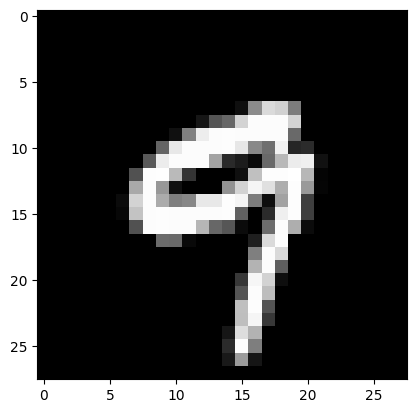

In [56]:
prediction = model.predict(X_test[6].reshape(1, -1))
predicted_digit = np.argmax(prediction)
print(f'Predicted digit: {predicted_digit}')

image = X_test[6]
image = image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(image, interpolation='nearest')
plt.show()

In [57]:
# Function to predict digit from user-uploaded image
def predict_digit(image_path):
    # Open the image and reshape it to a 1D array
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img_array = np.array(img).flatten() / 255  # Normalize pixel values

    # Make prediction
    prediction = model.predict(img_array.reshape(1, -1))
    predicted_digit = np.argmax(prediction)

    return predicted_digit

# Example usage
image_path = 'path/to/your/image.png'  # Replace with the actual path to your image
predicted_digit = predict_digit(image_path)
print(f'The predicted digit is: {predicted_digit}')

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/image.png'